# Name: Abhinav Kumar


# PRN- 21070126006

# Branch- AIML A1

In [44]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Setting the theme for all the graphs using seaborn
sns.set_theme(style='ticks')

### Q1) Predict salary of an employee based on years of experience.

In [43]:
# Reading the csv file
df_exp = pd.read_csv("Salary_Data.csv")

In [28]:
df_exp.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [34]:
# info()- it tells the datatype and null value count in the dataframe
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [32]:
df_exp.shape

(30, 2)

In [33]:
df_exp.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [36]:
# Checking the number of null values in the dataframe
df_exp.isna().sum(axis=0)

YearsExperience    0
Salary             0
dtype: int64

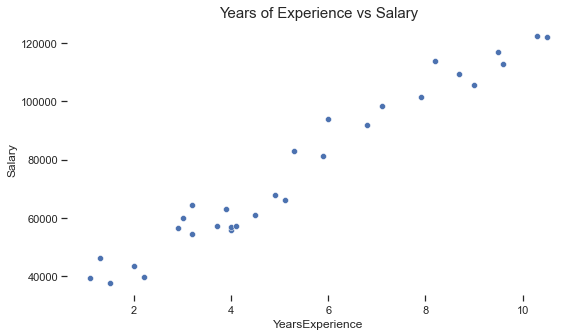

In [55]:
# Plotting the graph between two columns which are 'YearsExperience' and 'Salary'.
plt.figure(figsize=(9,5))
sns.scatterplot(x = 'YearsExperience', y= 'Salary',data = df_exp,palette='vlag')
plt.title("Years of Experience vs Salary", fontsize=15)
sns.despine(left=True,bottom=True)

<AxesSubplot:xlabel='Salary'>

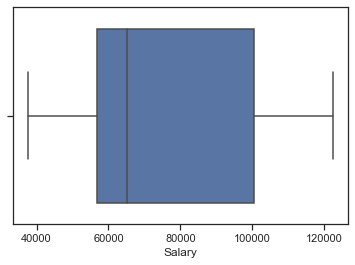

In [56]:
# This boxplot tells us that the majority salary given is between 55k to 100k
sns.boxplot(df_experience['Salary'])

In [45]:
# Preparing and fitting the model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [57]:
# Setting the columns to X and y for training and testing
X = df_exp[['YearsExperience']]
y = df_exp[['Salary']]

In [47]:
# Splitting the dataset for training and testing using train_test_split method
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

The training score is : 0.9395413526983522
The testing score is : 0.9779208335417602
The R2 score is :0.9779208335417602
The RMSE value is 4733.70258289858
[[83264.95426841]]
[[64505.53328452]
 [47622.05439902]]


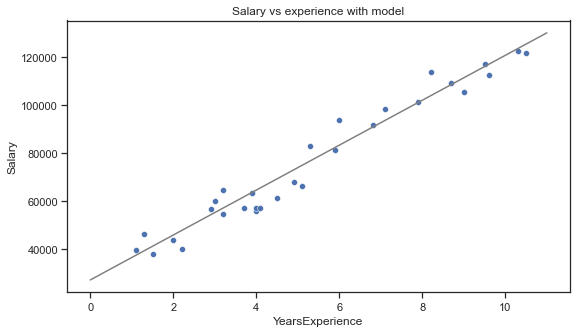

In [54]:
def linear_regression():
  lr = LinearRegression() # Instanciating the module
  lr.fit(X_train,y_train) # Fitting the data

  predicted_values = lr.predict(X_test) # Predicting the data
  print(f"The training score is : {lr.score(X_train,y_train)}")
  print(f"The testing score is : {lr.score(X_test,y_test)}")
  score = r2_score(y_test,predicted_values)
  rmse = mean_squared_error(y_test,predicted_values,squared=False)

  print(f"The R2 score is :{score}")
  print(f"The RMSE value is {rmse}")
  
# Plotting the model
  plt.figure(figsize=(9,5))
  x = np.linspace(0,11,100)
  f_x = (lr.coef_ * x + lr.intercept_).ravel()
  sns.lineplot(x = x,y = f_x,color='grey');
  sns.scatterplot(x = X['YearsExperience'],y = y['Salary'])# Using scatter plot to show the salary based on years of experience
  plt.title("Salary vs experience with model")

  # Predicting the salary based on the experience
  print(lr.predict([[6]]))

  print(lr.predict([[4],
               [2.2]]))
  
linear_regression()

  

 

### Q2) Predict salary based on below data - position_salaries.csv.

In [58]:
df_position = pd.read_csv('Position_Salaries.csv')

In [59]:
df_position.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [60]:
df_position.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [61]:
df_position.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


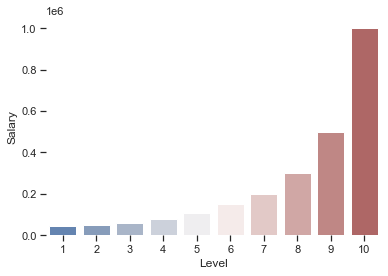

In [62]:
# This bar plot shows how the salary is increasing wrt the level of position.
sns.barplot(x='Level',y='Salary',data=df_position,palette='vlag')
sns.despine(left=True, bottom=True)

In [65]:
# Seperating the features and target variables
X = df_position[['Level']]
y = df_position[['Salary']]

In [66]:
# Splitting the dataset for training and testing using train_test_split method
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

The training score is : 0.6310028824447103
The testing score is : 0.8588877328994488
The R2 score is :0.8588877328994488
The RMSE value is 73888.27256549199
[[142825.11210762]]


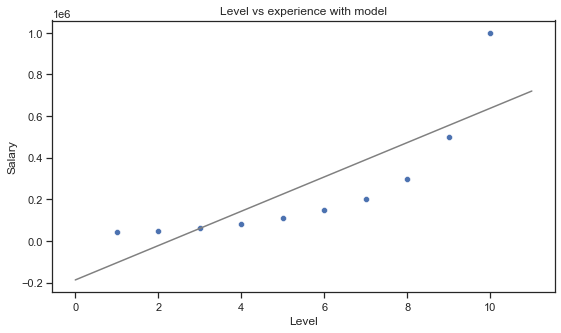

In [72]:
def linearRegression():
  lr = LinearRegression().fit(X_train,y_train)

  print(f"The training score is : {lr.score(X_train,y_train)}")
  print(f"The testing score is : {lr.score(X_test,y_test)}")

  predicted_values = lr.predict(X_test)

  score = r2_score(y_test,predicted_values)
  rmse = mean_squared_error(y_test,predicted_values,squared=False)
  print(f"The R2 score is :{score}")
  print(f"The RMSE value is {rmse}")

  # Plotting the model
  plt.figure(figsize=(9,5))
  x = np.linspace(0,11,100)
  f_x = (lr.coef_ * x + lr.intercept_).ravel()
  sns.lineplot(x = x,y = f_x,color='grey');
  sns.scatterplot(x = X['Level'],y = y['Salary'])
  plt.title("Level vs experience with model")
  
  # Predicting the salary based on position level
  print(lr.predict([[4]]))

linearRegression()